<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/Human_Horse_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human-Horse Classifier

## Imports

In [13]:
import urllib.request
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

## Load data

In [2]:
training_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
training_file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(training_url, training_file_name)

zip_ref = zipfile.ZipFile(training_file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"
validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()



# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=(300, 300),
        class_mode='binary')

# All images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Define model

In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


## Show summary of model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

## Compile model

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train data

In [10]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
33/33 [==============================] - 89s 3s/step - loss: 0.5468 - accuracy: 0.7701 - val_loss: 2.3217 - val_accuracy: 0.7344
Epoch 2/15
33/33 [==============================] - 91s 3s/step - loss: 0.2110 - accuracy: 0.9086 - val_loss: 2.6242 - val_accuracy: 0.7852
Epoch 3/15
33/33 [==============================] - 88s 3s/step - loss: 0.0633 - accuracy: 0.9758 - val_loss: 2.2131 - val_accuracy: 0.7070
Epoch 4/15
33/33 [==============================] - 88s 3s/step - loss: 0.1282 - accuracy: 0.9446 - val_loss: 1.4491 - val_accuracy: 0.8398
Epoch 5/15
33/33 [==============================] - 88s 3s/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 2.5665 - val_accuracy: 0.8008
Epoch 6/15
33/33 [==============================] - 89s 3s/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 1.9378 - val_accuracy: 0.8594
Epoch 7/15
33/33 [==============================] - 88s 3s/step - loss: 0.0122 - accuracy: 0.9933 - val_loss: 1.9147 - val_accuracy: 0.8398
Epoch 8/15
33/33 [==

## Plot the learning curve

### Plot the accuracy vs epoch graph

In [16]:
import matplotlib.pyplot as plt

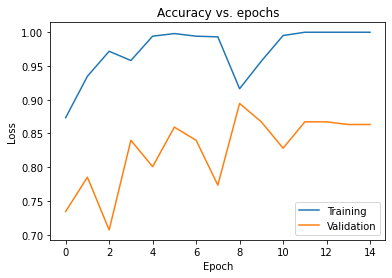

In [17]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

### Plot the loss vs epochs graph

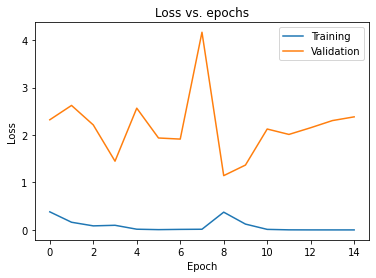

In [19]:
# Evaluate the model on the test set
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()